<a href="https://colab.research.google.com/github/EvM82/Machine-Learning-25/blob/main/exercise2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from itertools import product
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load the dataset (file path) from kaggle
path = kagglehub.dataset_download("adityakadiwal/water-potability")
print("Path to dataset files:", path)

100%|██████████| 251k/251k [00:00<00:00, 23.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adityakadiwal/water-potability/versions/3


## Ερώτημα 1

In [3]:
df = pd.read_csv(f'{path}/water_potability.csv')
print(df.head())
print('\n \n ----Dataset description----\n')
print(df.describe())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

 
 ----Dataset description----

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276

Δημιουργία ιστοηγράμματος για καθε μεταβλητή, εκτός της 'Potability', το όνομα της οποίας αφαιρείται από τη λίστα ονομάτων με τις μεταβλητές που δίνω στην hist.

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>]], dtype=object)

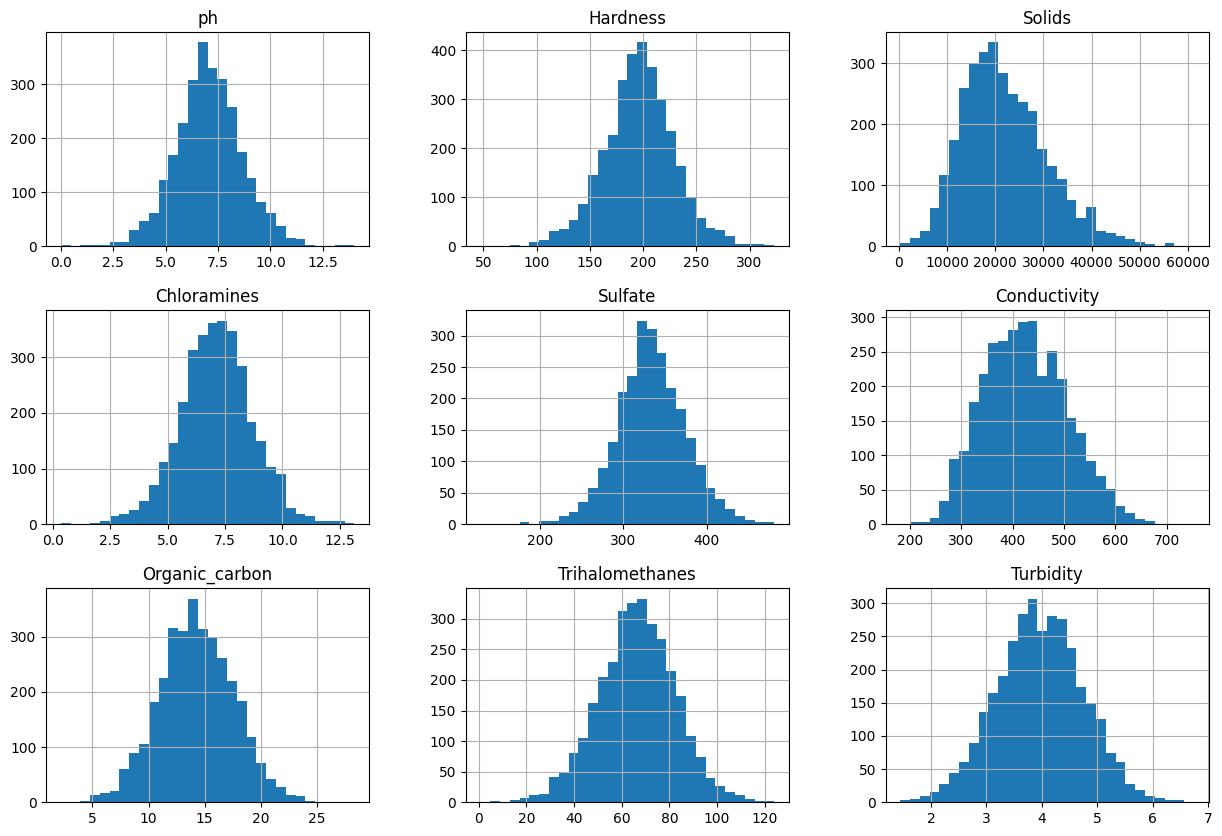

In [4]:
clm=list(df.columns)
clm.remove('Potability')
df.hist(column=clm,figsize=(15, 10), bins=30)

Δημιουργία ραβδόγραμματος για τη 'Potability'.

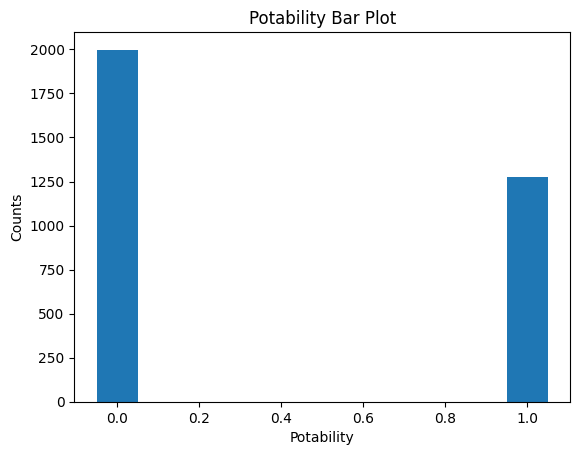

In [5]:
plt.bar(df['Potability'].value_counts().index, df['Potability'].value_counts().values, width=0.1)
plt.title('Potability Bar Plot')
plt.xlabel('Potability')
plt.ylabel('Counts')
plt.show()

Όπως παρατηρώ από το outcome της describe, στο count οι μεταβλητές δεν έχουν το ίδο πλήθος τιμών, κάτι που αποτελέι ένδειξη ότι υπάρχουν ελλιπείς τιμές στα χαρακτηριστικά. Συγκεκριμένα όλες εκτός από τις ph, Sulfate, Trihalomethanes έχουν count=3276.

Εύρεση πλήθους ελλιπών τιμών. Παρατηρώ ότι τα ph,Sulfate,Trihalomethanes δίνουν ελλιπείς τιμές.

In [6]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Ποσοστά πόσιμου και μη πόσιμου νερού. <br> <br> Η συννάρτηση υπολογίζει το ποσοστό παίρνοντας ως arguments το συνολικό πλήθος παραδειγμάτων και το πλήθος των δειγμάτων το ποσοστό των οποίων θέλω να βρω. Τα l1, l2 είναι το πλήθος των δειγμάτων που έχουν 'Potability' τιμή 0 ή 1 αντίστοιχα (0 μη πόσιμο και 1 πόσιμο). Εναλλακτικά μπορούσε να χρησιμοποιηθεί η value.counts() για τη μεταβλητή 'Potability'. Στην αρχή, τυπώνονται οι μοναδικές τιμές της μεταβλητής για εξακρύβωση ότι πρόκειται για δυαδική τιμή.

In [7]:
def find_perc(len,len_total):
  x=(len*100)/len_total
  return x

print('Unique values in Potability: ', df['Potability'].unique())


l1=(df['Potability'] == 0).sum()
l2=(df['Potability'] == 1).sum()
p1=find_perc(l1,len(df))
p2=find_perc(l2,len(df))
print(f'The percentage of potable is {p2:.2f}% and of non potable {p1:.2f}%')

Unique values in Potability:  [0 1]
The percentage of potable is 39.01% and of non potable 60.99%


Στα δεδομένα, από τα ιστογράμματα των χαρακτηριστικών φαίνεται ότι όλες οι μεταβλητές ακολουθούν ή προσεγγίζουν (πχ  Chloramines, Sulfate, Condactivity) την κανονική κατανομή, κάτι το οποίο διευκολύνει την διαχείριση των δεδομένων και την πρόβλεψη του μοντέλου που θα χρησιμοποιηθεί. Επίσης, ο διαχωρισμός των κλάσεων είναι 40 με 60 που σημαίνει ότι δεν υπάρχει έντονη ανομοιομορφία και οι δύο κλάσεις είναι σχετικά ισορροπημένες, οπότε δεν θα δημιουργείται πρόβλημα στο μοντέλου εφόσον θα έχει αρκετά δείγματα και για τις δύο κατηγορίες προς διαχωρισμό και δεν θα μεροληπτεί υπέρ κάποιας. Παρατηρείται ότι υπάρχουν ελλιπείς τιμές, οι οποίες όμως είναι λίγες συγκριτικά με το συνολικό πλήθος των δειγμάτων (από τις 3276 γραμμές(δείγματα) που περιέχονται σε κάθε μεταβλητή, οι περισσότερες ελλιπείς τιμές που υπάρχουν σε μία  μεταβλητή είναι 781), ενώ μόνο 3 από τις 10 μεταβλητές έχουν ελλιπείς τιμές. Τέλος, εφόσον το πλήθος των ελλιπών τιμών δεν είναι μεγάλο, αν χρησιμοποιηθούν αλγόριθμοι όπως τα δέντρα αυτό δεν αναμένεται να δημιουργήσουν μεγάλο πρόβλημα, καθώς υπάρχουν τρόποι διαχείρισής τους.Επόμενως η ποιότητα των δεδομένων είναι ικανοποιητική.

## Ερώτημα 2

Παρακάτω χωρίζονται τα δεδομένα βάση της τιμής pH που έχουν και μετριέται το πλήθος πόσιμων και μη πόσιμων δειγμάτων για κάθε κατηγορία ( groupby('Potability').size() )

In [8]:
df_pt=df[['Potability', 'ph']]

filtered = df_pt[df_pt['ph'] < 6.5]
s1 = filtered.groupby('Potability').size()
s1_0=s1[0]
s1_1=s1[1]

filtered = df_pt[(df_pt['ph'] >= 6.5) & (df_pt['ph'] <= 8.5)]
s2 = filtered.groupby('Potability').size()
s2_0=s2[0]
s2_1=s2[1]

filtered = df_pt[df_pt['ph'] > 8.5]
s3 = filtered.groupby('Potability').size()
s3_0=s3[0]
s3_1=s3[1]

print(f'{s1},{s2},{s3}')
print('\nCounts in s1,s2,s3: ', s1.sum() + s2.sum() + s3.sum(),'Length of dataframe: ',len(df_pt))
#print('Counts in s1,s2,s3 for check: ', s1_0 + s1_1 + s2_0 + s2_1 + s3_0 + s3_1)


Potability
0    612
1    356
dtype: int64,Potability
0    745
1    583
dtype: int64,Potability
0    327
1    162
dtype: int64

Counts in s1,s2,s3:  2785 Length of dataframe:  3276


Υπάρχει διαφορά στο μήκος (3276 και 2785) γιατί το ph όπως είδαμε παραπάνω έχει ελλιπείς 491 τιμές (3276-2785=491).

Ποσοστά για κάθε κατηγορία χρησιμοποιώντας τη συνάρτηση find_perc που ορίστηκε παραπάνω.

In [9]:
#percentage for each category for potable ('Potable'=1)
s_total=s1_1 + s2_1 + s3_1
p4=find_perc(s1_1,s_total)
p5=find_perc(s2_1,s_total)
p6=find_perc(s3_1,s_total)
print(f'Potable. The percentage of ph<6.5 is {p4:.2f}%, of 6.5<=ph<=8.5 is {p5:.2f}% and of ph>8.5 {p6:.2f}%')

#percentage for each category for non potable ('Potable'=0)
s_total=s1_0 + s2_0 + s3_0
p7=find_perc(s1_0,s_total)
p8=find_perc(s2_0,s_total)
p9=find_perc(s3_0,s_total)
print(f'Non Potable. The percentage of ph<6.5 is {p7:.2f}%, of 6.5<=ph<=8.5 is {p8:.2f}% and of ph>8.5 {p9:.2f}%')

print('\nChecking- the total percentages for each (portable and non portable must give 100) ',p4+p5+p6, 'and ', p7+p8+p9)

Potable. The percentage of ph<6.5 is 32.33%, of 6.5<=ph<=8.5 is 52.95% and of ph>8.5 14.71%
Non Potable. The percentage of ph<6.5 is 36.34%, of 6.5<=ph<=8.5 is 44.24% and of ph>8.5 19.42%

Checking- the total percentages for each (portable and non portable must give 100)  100.0 and  100.0


Παρακάτω παρουσιάζεται ραβδόγραμμα για τα πόσιμα και για τα μη πόσιμα με το πλήθος τους σε κάθε διάστημα για ευκολότερη ανάλυση. Τα ποσοστά που υπολογίζονται και τυπώνονται (πάνω) είναι ως προς το πλήθος των πόσιμων και μη πόσιμων αντίστοιχα. Δηλαδή για παράδειγμα, πόσα από τα πόσιμα δείγματα ανήκουν στην κατηγορία PH μικρότερο του 6.5 και ούτω καθεξής. Ενώ στο ραβδόγραμμα τυπώνονται οι τιμές σχετικά με το πλήθος όλων των δειγμάτων πόσιμων και μη πόσιμων που υπάρχουν στα δεδομένα. Δηλαδή για παράδειγμα περίπου 600 από όλα τα δείγματα των δεδομένων είναι μη πόσιμα με PH<6.5.
<br>Παρατηρείται (από ραβδόγραμμα αλλά και από τα εκτυπωμένα ποσοστά) ότι για PH μικρότερο του 6.5 η πλειοψηφία των δειγμάτων είναι μη πόσιμα (σχεδόν τα διπλάσια από τα πόσιμα), για PH>8.5 επίσης τα περισσότερα δείγματα που βρίσκονται σε αυτό το εύρος είναι μη πόσιμα (πάλι σχεδόν τα διπλάσια είναι μη πόσιμα από ότι πόσιμα). Στην περίπτωση του εύρους 6.5 με 8.5 τα πόσιμα είναι περισσότερα από ό,τι στα άλλα εύρη αλλά το πλήθος μη πόσιμων είναι περισσότερο αν και η διαφορά τους δεν είναι τόσο έντονη. Αν λάβουμε υπόψιν και ότι συνολικά ο αριθμός των μη πόσιμων είναι μεγαλύτερος από αυτόν των πόσιμων (60-40)και άρα υπάρχουν περισσότερα δείγματα για αυτήν την κατηγορία, τα αποτελέσματα πιθανώς να σημαίνουν ότι όντως το πιο κατάλληλο PH είναι μεταξύ 6.5 και 8.5 αλλά αυτό δεν μπορεί να αποτελέσει μοναδικό κριτήριο, καθώς αρκετά μη πόσιμα δείγματα εμπίπτουν κι αυτά σε αυτό το εύρος και θα έπρεπε να εξεταστούν κι άλλες παράμετροι για τον χαρακτηρισμό ενός δείγματος ως πόσιμου ή μη.

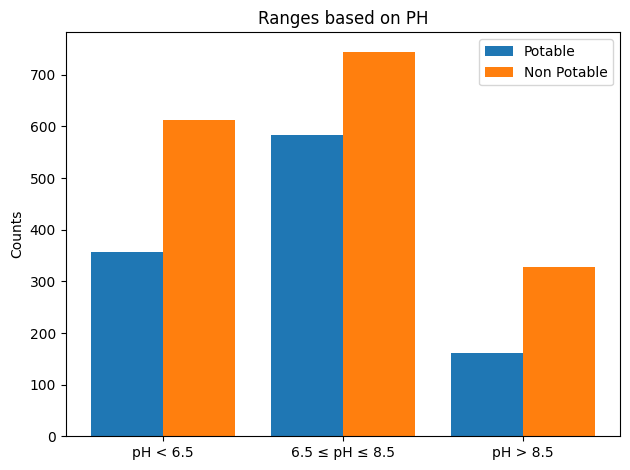

In [10]:

labels = ['pH < 6.5', '6.5 ≤ pH ≤ 8.5', 'pH > 8.5']
potable = [s1_1, s2_1, s3_1]
non_potable = [s1_0, s2_0, s3_0]


x = range(len(labels))

plt.bar(x, potable, width=0.4, label='Potable', align='center')
plt.bar([i + 0.4 for i in x], non_potable, width=0.4, label='Non Potable', align='center')

plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel('Counts')
plt.title('Ranges based on PH')
plt.legend()
plt.tight_layout()
plt.show()


## Ερώτημα 3

Από το scatter plot τα δείγματα των ποσιμων και των μη πόσιμων φαίνεται να μην είναι ξεχωριστά αλλά αναμειγμένα στο διάγραμμα (επικαλύπτονται). Οπότε δεν φαίνεται κάποια συσχέτιση ως προς τα επίπεδα επίπεδα χλωραμίνης πέρα του ότι γενικότερα όλα τα δείγματα εινια συγκεντρωμένα στην περιοχή με επίπεδα χλωραμίνης περίπου 4-11 και pH επίσης περίπου 4-11. Αυτό μπορεί να σημαίνει ότι όπως και με το pH, τα επίπεδα χλωραμίνης δεν αρκούν από μόνα τους για τον χαρακτηρισμό ενός δείγματος ως πόσιμο ή μη πόσιμο, δηλαδή δεν αρκόυν για τον διχωρισμό των δεδομένων σε πόσιμα και μη.

<Axes: xlabel='ph', ylabel='Chloramines'>

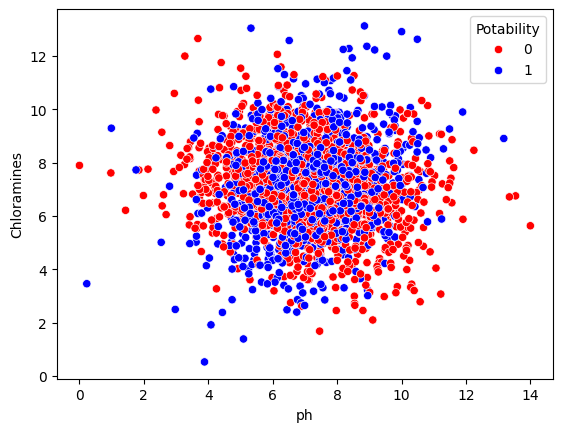

In [11]:
sns.scatterplot(data=df, x='ph', y='Chloramines', hue='Potability', palette={1:'blue', 0:'red'})

## Ερώτημα 4

Από το ερώτημα 1 γνωρίζουμε ότι κενές τιμές έχουν οι μεταβλητές Trihalomethanes ph και Sulfate. Επομένως οι κενές τιμές των μεταβλητών αυτών γεμίστηκαν βάση της τιμής Potability της ομάδας που ανήκουν, βάση  μέσου όρου.
Ο κώδικας θα χωρίσει τα δεδομένα βάση της τιμής στο 'Potability' και στις στήλες 'Trihalomethanes', 'ph', 'Sulfate' (βάση της τιμής col κάθε φορά) θα υπολογίσει τον μέσο όρο για κάθε μία από τις 2 κατηγορίες (πόσιμο και μη πόσιμο). Τις κενές τιμές των τριών αυτών στηλών που υπάρχουν θα τις συμπληρώσει βάση του σε ποια κατηγορία ανήκουν με τον μέσο όρο. Χρησιμοποιείται το transform, οπότε το dataframe που θα επιστραφεί θα έχει ίδιο αριθμό στηλών με το αρχικό, απλά θα έχει γίνει η αλλαγή των κενών τιμών με τον αντίστοιχο μέσο όρο.

In [12]:
for col in ['Trihalomethanes', 'ph', 'Sulfate']:
    df[col] = df.groupby('Potability')[col].transform(lambda x: x.fillna(x.mean()))


Έλγχος ότι πλέον δεν υπάρχουν κενές τιμές στα δεδομένα.

In [13]:
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


## Ερώτημα 5

Δημιουργία των x(inputs) και y(target).

In [14]:
input_df = df.drop(columns=['Potability'])
targets_df = df['Potability']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((3276, 9), (3276,))

Διαχωρισμός δεδομένων σε train-test με ποσοστό 70-30 και random seed:0.

In [15]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

## Ερώτημα 6

In [16]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
#Predict in train dataset
y_pred_tr = clf.predict(x_train)

accuracy = accuracy_score(y_train, y_pred_tr)
print(f'Accuracy in train: {accuracy}')

#Predict in test dataset
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy in test: {accuracy}')

Accuracy in train: 1.0
Accuracy in test: 0.7344862665310274


Παρατηρείται ότι το μοντέλο προβλέπει τέλεια τα δεδομένα εκπαίδευσης και λειτουργεί αρκετά καλά σε άγνωστα δεδομένα. Αυτό μπορεί να είναι σημάδι υπερπορσαρμογής καθώς στο train dataset έχει ακρίβεια 100%, άρα τα βρίσκει όλα σωστά ενώ στο test dataset κάνει λάθη.

## Ερώτημα 7

Για τη δοκιμή των διαφορετικών συνδυασμών χρησιμοποιείται το product, το οποίο βάση των λιστών με τις τιμές που ζητούνται για κάθε argument θα δημιουργήσει όλους τους πιθανούς συνδυασμούς για τους οποίους στη συνέχεια θα οριστεί, εκπαιδευτεί και δοκιμαστεί το μοντέλο. <br>
Από τα argument, το criterion ορίζει με ποιον τρόπο θα επιλέγει ο αλγόριθμος την καταλληλότερη διαδρομή. Το max_depth ορίζει το μέγιστο βάθος (αν δεν δωθεί αριθμός, συνεχίζει μέχρι τέλους, δηλαδή δημιουργία αμιγών κόμβων). Το min_samples_split ορίζει πόσα δείγματα τουλάχιστον χρειάζεται για να διαχωρίσει τα παραδείγματα ενός κόμβου. Το min_samples_leaf οριζει τον ελάχιστο αριθμό παραδειγμάτων για κάθε φύλλο. Το max_features ορίζει τον αριθμό  των χαρακτηριστικών προς εξέταση κάθε φορά που ψάχνει κατλάλληλο διαχωρισμό ο αλγόριθμος και το ccp_alpha ορίζει αν και κατά πόσο θα γίνεται κλάδεμμα.

In [18]:
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_list = [None, 'sqrt']
ccp_alphas = [0, 0.01]
results = []

for crit, depth, split, leaf, feat, alpha in product(
    criteria, max_depths, min_samples_splits, min_samples_leafs, max_features_list, ccp_alphas
):
    clf = DecisionTreeClassifier(
        criterion=crit,
        max_depth=depth,
        min_samples_split=split,
        min_samples_leaf=leaf,
        max_features=feat,
        ccp_alpha=alpha,
        random_state=1
    )
    clf.fit(x_train, y_train)

    #Predict in train dataset
    y_pred_tr = clf.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_tr)

    #Predict in test dataset
    y_pred = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)

    results.append({
        'criterion': crit,
        'max_depth': depth,
        'min_samples_split': split,
        'min_samples_leaf': leaf,
        'max_features': feat,
        'ccp_alpha': alpha,
        'train_acc': train_acc,
        'test_acc': test_acc
    })

results_df = pd.DataFrame(results)
results_df


,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_acc,test_acc
0,gini,NaN,2,1,None,0.00,1.000000,0.739573
1,gini,NaN,2,1,None,0.01,0.716529,0.729400
2,gini,NaN,2,1,sqrt,0.00,1.000000,0.724313
3,gini,NaN,2,1,sqrt,0.01,0.675970,0.671414
4,gini,NaN,2,2,None,0.00,0.966856,0.733469
...,...,...,...,...,...,...,...,...
91,entropy,5.0,5,1,sqrt,0.01,0.732665,0.719227
92,entropy,5.0,5,2,None,0.00,0.759267,0.746694
93,entropy,5.0,5,2,None,0.01,0.733101,0.739573
94,entropy,5.0,5,2,sqrt,0.00,0.736590,0.719227


## Ερώτημα 8

Από το result_df όπου υπάρχουν οι δυνατοί συνδυασμοί με τις τιμές ακρίβειας στα test, train, κρατώνται μόνο όσοι έχουν max_depth=3 για να βρεθεί ο συνδυασμός που δίνει τη μεγαλύτερη ακρίβεια για αυτή τη τιμή. Και στη συνέχεια βρίσκεται η μεγαλύτερη τιμή για το 'test_acc' και επιστρέφεται όλη γραμμή (οι τιμές όλων των arguments που έδωσαν τον συνδυασμό αυτόν).

In [19]:
dpt=results_df[results_df['max_depth']==3]
best_row = dpt.loc[dpt['test_acc'].idxmax()]
print(best_row)

criterion                gini
max_depth                 3.0
min_samples_split           2
min_samples_leaf            1
max_features             None
ccp_alpha                 0.0
train_acc            0.716092
test_acc             0.726348
Name: 16, dtype: object


Επανεκπαίδευση για τον δυνδυασμό που βρέθηκε να δίνει τη μεγαλύτερη ακρίβεια στο test για max_depth=3.0

In [20]:
clf = DecisionTreeClassifier(
        criterion='gini',
        max_depth=3,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=None,
        ccp_alpha=0.0,
        random_state=1
    )
clf.fit(x_train, y_train)


#Predict in train dataset
y_pred_tr = clf.predict(x_train)
accuracy = accuracy_score(y_train, y_pred_tr)
print(f'Accuracy in train: {accuracy}')

#Predict in test dataset
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy in test: {accuracy}')

Accuracy in train: 0.7160924552987353
Accuracy in test: 0.7263479145473042


[Text(0.5, 0.875, 'x[4] <= 333.327\ngini = 0.478\nsamples = 2293\nvalue = [1388, 905]'),
 Text(0.25, 0.625, 'x[4] <= 332.527\ngini = 0.499\nsamples = 1077\nvalue = [513, 564]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 6.16\ngini = 0.485\nsamples = 862\nvalue = [505, 357]'),
 Text(0.0625, 0.125, 'gini = 0.353\nsamples = 205\nvalue = [158, 47]'),
 Text(0.1875, 0.125, 'gini = 0.498\nsamples = 657\nvalue = [347, 310]'),
 Text(0.375, 0.375, 'x[4] <= 332.68\ngini = 0.072\nsamples = 215\nvalue = [8, 207]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 200\nvalue = [0, 200]'),
 Text(0.4375, 0.125, 'gini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(0.75, 0.625, 'x[4] <= 334.681\ngini = 0.404\nsamples = 1216\nvalue = [875, 341]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[4] <= 334.054\ngini = 0.022\nsamples = 366\nvalue = [362, 4]'),
 Text(0.5625, 0.125, 'gini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 352\nvalue = [352,

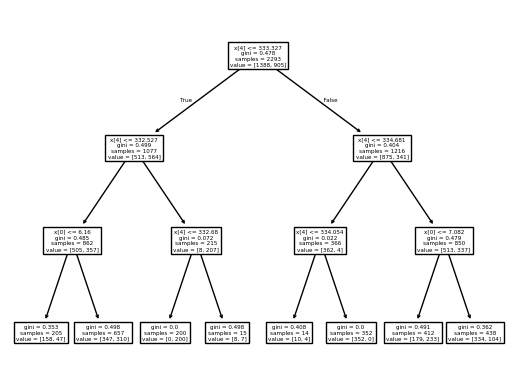

In [21]:
tree.plot_tree(clf)

<mark>Κανόνας 1</mark> (ρίζα): Η τιμή του  χαρακτηριστικού 5 (x[4]) μικρότερη ή ίση από 333.327.<br>
--Αριστερό υπόδεντρο---<br>
<mark>Κανόνας 2</mark> -Αν ισχύει ο Κανόνας 1: Η τιμή του  χαρακτηριστικού 5 (x[4]) μικρότερη ή ίση από 332.527.<br>
<mark>Κανόνας 3</mark> -Αν ισχύει ο Κανόνας 2: Η τιμή του  χαρακτηριστικού 1 (x[0]) μικρότερη ή ίση από 6.16.<br>
Αν ισχύει ο Κανόνας 3 έχω την κατηγορία 0 αλλά κι αν δεν ισχύει πάλι έχω την κατηγορία 0, με άλλες τιμές gini (λίγο μεγαλύτερη, δηλαδή ο κόμβος στην περίπτωση που ισχύει ο κανόνας, η κατανομή δηλαδή εκέι είναι πιο ομοιογενής).<br>
<mark>Κανόνας 4</mark> -Αν δεν ισχύει ο Κανόνας 2: Η τιμή του χαρακτηριστικού 5 (x[4]) μικρότερη ή ίση από 332.68.<br>
Αν ισχύει ο Κανόνας 4 έχω αμιγής κατηγορία 1 ενώ αν δεν ισχύει έχω την κατηγορία 0 με gini 0.498.<br>

--Δεξί υπόδεντρο-- <br>
<mark>Κανόνας 5</mark> -Αν δεν ισχύει ο Κανόνας 1: Η τιμή του χαρακτηριστικού 5 (x[4]) μικρότερη ή ίση από 334.681.<br>
<mark>Κανόνας 6</mark>- Αν ισχύει ο Κανόνας 5: Η τιμή του χαρακτηριστικού 5 (x[4]) μικρότερη ή ίση από 334.054.<br>
Αν ισχύει έχω την κατηγορία 0 με gini 0.408 και αν δεν ισχύει έχω την κατηγορία 0 με αμιγή κόμβο (gini=0.0).<br>
<mark>Κανόνας 7</mark> -Αν δεν ισχύει ο Κανόνας 5: Η τιμή του χαρακτηριστικού 1 (x[0]) μικρότερη ή ίση από 7.082.<br>
Αν ισχύει έχω την κατηγορία 1 με gini 0.491 και αν δεν ισχύει έχω την κατηγορία 0 με gini 0.362.



Παρατηρείται ότι σε κάποια φύλλα το gini είναι κοντά στο 0.5 που σημαίνει ότι υπάρχουν δείγματα και από τις δύο κατηγορίες και επιλέγεται αυτή που επικρατεί πιο πολύ. Επίσης φαίνεται ότι το δέντρο βασίζεται στο πρώτο και πέμπτο χαρακτηριστικό για τον διαχωρισμό.

## Ερώτημα 9

Εύρεση συνδυασμού που έχει τη μεγαλύτερη ακρίβεια στο test.

In [23]:
best_row = results_df.loc[results_df['test_acc'].idxmax()]
print(best_row)

criterion                gini
max_depth                 5.0
min_samples_split           2
min_samples_leaf            2
max_features             None
ccp_alpha                 0.0
train_acc            0.777148
test_acc             0.754832
Name: 36, dtype: object


Επανεκπαίδευση για τον δυνδυασμό που βρέθηκε να δίνει τη μεγαλύτερη ακρίβεια στο test.

In [24]:
clf = DecisionTreeClassifier(
        criterion='gini',
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features=None,
        ccp_alpha=0.0,
        random_state=1
    )
clf.fit(x_train, y_train)


#Predict in train dataset
y_pred_tr = clf.predict(x_train)
accuracy = accuracy_score(y_train, y_pred_tr)
print(f'Accuracy in train: {accuracy}')

#Predict in test dataset
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy in test: {accuracy}')

Accuracy in train: 0.7771478412559966
Accuracy in test: 0.7548321464903357


Ραβδόγραμμα με τη σημαντικότητα κάθε χαρακτηριστικού (feature importance) σύμφωνα με το νέο δέντρο που εκπαιδεύτηκε. Χρησιμοποιείται το feature_importances_ για εύρεση σειράς με την σημαντικότητα του κάθε χαρακτηριστικού στο δέντρο και στη συνέχεια σχεδιάζεται το ραβδόγραμμά τους.

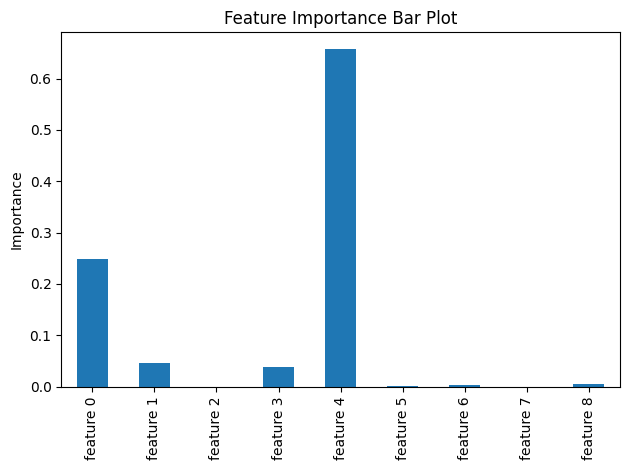

In [25]:
importance = clf.feature_importances_
feature_names = [f"feature {i}" for i in range(x.shape[1])]
forest_importances = pd.Series(importance, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title('Feature Importance Bar Plot')
ax.set_ylabel('Importance')
fig.tight_layout()

Παρατηρούμε, οτι τα χαρακτηριστικά με την μεγαλύτερη συμβολή είναι το χαρακτηριστικό 4 και μετά το 0. Τα χαρακτηριστικά 5,6,8 έχουν ελάχιστη συνεισφορά ενώ τα 2, 7 σχεδόν μηδεική.

Αν μπορούν να υποστηριχθούν μέχρι 5 αναλύσεις, τότε προτιμότερο είναι να επιλεχθούν τα 5 χαρακτηριστικά με την μεγαλύτερη σημαντικότητα, δηλαδή τα χαρακτηριστικά 4, 0, 1, 3 και 8, καθώς αυτά φαίνεται να βοηθούν το μοντέλο περισσότερο στον διαχωρισμό.

## Ερώτημα 11

(το Ερώτημα 10 ήταν ίδιο με το 9)

Ένα τυχαίο δάσος, δημιουργεί πολλά δέντρα, τα οποία εκπαιδεύονται σε διαφορετικά δεδομένα εκπαίδευσης (τα οποία είναι υποσύνολα που προκύπτουν από το αρχικό σύνολο δεδομένων) και κρατάνε διαφορετικά χαρακτηριστικά μεταξύ τους. Η τελική απόφαση προκύπτει από τη συνδυαστική έξοδο των δέντρων (πχ ποιο αποτέλεσμα επικρατεί). Αυτό επιτρέπει σε ένα τυχαίο δάσος να χειρίζεται καλύτερα πολλά χαρακτηριστικα ενώ δεν είναι τόσο επιρρεπές στην υπερπροσαρμογή όσο ένα δέντρο απόφασης, το οποίο επιρρεάζεται περισσότερο από θόρυβο ή outliers.

## Ερώτημα 12

In [26]:
clf2 = RandomForestClassifier()
clf2.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
#Predict in train dataset
y_pred_tr = clf2.predict(x_train)

accuracy = accuracy_score(y_train, y_pred_tr)
print(f'Accuracy in train: {accuracy}')

#Predict in test dataset
y_pred = clf2.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy in test: {accuracy}')

Accuracy in train: 1.0
Accuracy in test: 0.8006103763987793


Παρατηρείται ότι στα train δεδομένα έχει τέλεια απόδοση ενώ στα test, έχει υψηλή αλλά όχι 100%, κάτι που αποτελεί ένδειξη overfitting.

Εκπαίδευση για τους διαφορετικούς συνδυασμούς (οι συνδυασμοί του Ερωτήματος 7 με προσθήκη πλήθους των δέντρων (n_estimators) για 50, 100 και 200 δέντρα.

In [28]:
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_list = [None, 'sqrt']
ccp_alphas = [0, 0.01]
n_estimators= [50, 100 , 200 ]
results = []

for crit, depth, split, leaf, feat, alpha,n_estim in product(
    criteria, max_depths, min_samples_splits, min_samples_leafs, max_features_list, ccp_alphas,n_estimators
):
    clf = RandomForestClassifier(
        criterion=crit,
        max_depth=depth,
        min_samples_split=split,
        min_samples_leaf=leaf,
        max_features=feat,
        ccp_alpha=alpha,
        n_estimators=n_estim,
        random_state=1
    )
    clf.fit(x_train, y_train)

    #Predict in train dataset
    y_pred_tr = clf.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_tr)

    #Predict in test dataset
    y_pred = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)

    results.append({
        'criterion': crit,
        'max_depth': depth,
        'min_samples_split': split,
        'min_samples_leaf': leaf,
        'max_features': feat,
        'ccp_alpha': alpha,
        'n_estimators':n_estim,
        'train_acc': train_acc,
        'test_acc': test_acc
    })

results_df = pd.DataFrame(results)
results_df


,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,n_estimators,train_acc,test_acc
0,gini,NaN,2,1,None,0.00,50,1.000000,0.787386
1,gini,NaN,2,1,None,0.00,100,1.000000,0.786368
2,gini,NaN,2,1,None,0.00,200,1.000000,0.782299
3,gini,NaN,2,1,None,0.01,50,0.750545,0.744659
4,gini,NaN,2,1,None,0.01,100,0.746620,0.747711
...,...,...,...,...,...,...,...,...,...
283,entropy,5.0,5,2,sqrt,0.00,100,0.814653,0.801628
284,entropy,5.0,5,2,sqrt,0.00,200,0.815962,0.799593
285,entropy,5.0,5,2,sqrt,0.01,50,0.781945,0.783316
286,entropy,5.0,5,2,sqrt,0.01,100,0.784562,0.787386


Παρακάτω τυπώνεται ο συνδυασμός με τη μεγαλύτερη ακρίβεια στα test δεδομένα. Παρατηρείται ότι η ακρίβεια (test_acc:0.809766) είναι μεγαλύτερη από αυτή που έδινε ο αντίστοιχα καλύτερος συνδυασμός με Decision Tree (test_acc:0.754832). Ωστόσο, βλέπουμε ότι η ακρίβεια στο train είναι 1, που σημαίνει ότι μπορεί αυτός ο συνδυασμός να έχει overfitting στα train δεδομένα, μειώνοντας έτσι την ικανότητα γενίκευσης του μοντέλου σε νέα δεοδμένα.

In [29]:
best_row = results_df.loc[results_df['test_acc'].idxmax()]
print(best_row)

criterion                gini
max_depth                 NaN
min_samples_split           2
min_samples_leaf            1
max_features             sqrt
ccp_alpha                 0.0
n_estimators               50
train_acc                 1.0
test_acc             0.809766
Name: 6, dtype: object


## Ερώτημα 13

 Προτιμότερο για το μοντέλο είναι να προβλέπει καλύτερα το μη πόσιμο νερό χάνοντας ακρίβεια από το πόσιμο παρά το αντίθετο, καθώς εάν χαρακτηρίσει μη πόσιμα δείγματα ως πόσιμα, αυτό θα έχει σοβαρές συνέπειες στην υγεία καταναλωτών, το οποίο είναι πολύ πιο σοβαρό από την περίπτωση που θα χαρακτηρίσει πόσιμο νερό ως μη πόσιμο, όπου οι επιπτώσεις δεν θα σχετιστούν με την υγεία ανθρώπων (και πιθανώς με νομικές συνέπειες) αλλά πιθανώς με κάποια οικονομική επιβάρυνση της εταιρείας (πχ. καθαρισμός νερού που είναι ήδη καθαρό).

## Ερώτημα 14

Νομικά ασφαλέστερο για την εταιρεία είναι η χρήση του αλγορίθμου που θα έχει τη μεγαλύτερη επιτυχία στον διαχωρισμό των πόσιμων από μη πόσιμων δειγμάτων, και βάση και του Ερωτήματος 13, ιδιαίτερα σημαντικό είναι να έχει όσο δυνατόν λιγότερα False Positive γίνεται. Από ό,τι διαπιστώθηκε το Random Forest, δίνει υψηλότερα πσοστά. Για εξακριβωση, εκπαιδεύονται οι συνδυασμοί που βρέθηκαν ότι έχουν τη μεγαλύτερη ακρίβεια και υπολογίζεται και recall(πόσα False Positives έχει) και F1-score (η ισορροπία μεταξύ recall και precission). <br>
Στον συνδυασμό του Random Forest, όπως ήδη αναφέρθηκε υπάρχει ένδειξη για υπερπροσαρμογή, ωστόσο, η σύγκριση θα γίνει βάση των metrics στα test δεδομένα για διαπίστωση ποιο μοντέλο δίνει καλύτερο αποτέλεσμα σε άγνωστα δεδομένα (τα δεδομένα training και test που χρησιμοποιούνται και στα δύ μοντέλα είναι ατ ίδια). Σε επόμενο στάδιο θα γινόταν προσπάθειες να διορθωθεί η υπερποσαρμογή του μοντέλου με τακτικές όπως tuning παραμέτρων.

In [30]:
# Decision Tree
clf = DecisionTreeClassifier(
        criterion='gini',
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features=None,
        ccp_alpha=0.0,
        random_state=1
    )
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_prec = precision_score(y_test, y_pred)
print(f'Metrics in test fo Decision Tree: accuracy: {test_acc}, recall: {test_recall}, f1: {test_f1}, precision: {test_prec}')

Metrics in test fo Decision Tree: accuracy: 0.7548321464903357, recall: 0.46112600536193027, f1: 0.588034188034188, precision: 0.8113207547169812


In [31]:
#Random Forest
clf2 = RandomForestClassifier(
        criterion='gini',
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        ccp_alpha=0.0,
        n_estimators=50,
        random_state=1
    )
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_prec = precision_score(y_test, y_pred)
print(f'Metrics in test for Random Forest:accuracy: {test_acc}, recall: {test_recall}, f1: {test_f1}, precision: {test_prec}')

Metrics in test for Random Forest:accuracy: 0.8097660223804679, recall: 0.6487935656836461, f1: 0.7213114754098361, precision: 0.8120805369127517


Παρατηρείται ότι το Random Forest στα test δεδομένα έχει πολύ καλύτερα αποτελέσματα και η διαφορά είναι εμφανής κυρίως στα recall και F1 score όπου το Random Forest πετυχαίνει καλές επιδόσεις (υψηλό F1 score σημαίνει καλή ισορροπία recall-precission) ενώ το Decision Tree έχει recall και F1 πολύ χαμηλότερα. Άρα στη συγκεκριμένη περίπτωση, σε νέα δεδομένα το Random Forest έχει καλύτερη επίδοση και είναι προτιμότερο.